In [1]:
import numpy as np
from scipy.constants import h, c, k
import matplotlib.pyplot as plt

from common import *
from chromaticity_diagram import xyDiagram

In [2]:
def unit_scale(unit):
    return {'m': 1e0, 'um': 1e-6, 'nm': 1e-9}[unit]

def planck_function(wavelength, T, unit='m'):
    scale = unit_scale(unit)
    wavelength = wavelength * scale
    dividend = 2 * h * c**2 / wavelength**5
    divisor = np.exp(h * c /  k / T / wavelength) - 1
    result = dividend / divisor * scale
    
    return result

def max_wavelength(T, unit='m'):
    return 2.897e-3 / unit_scale(unit) / T

C:\Users\USER\AppData\Local\Temp\ipykernel_16852\1912354767.py:8: RuntimeWarning: overflow encountered in exp
  divisor = np.exp(h * c /  k / T / wavelength) - 1


Text(0, 0.5, 'Radiance ($W \\cdot m^{-2} \\cdot sr^{-1} \\cdot \\mu m^{-1}$)')

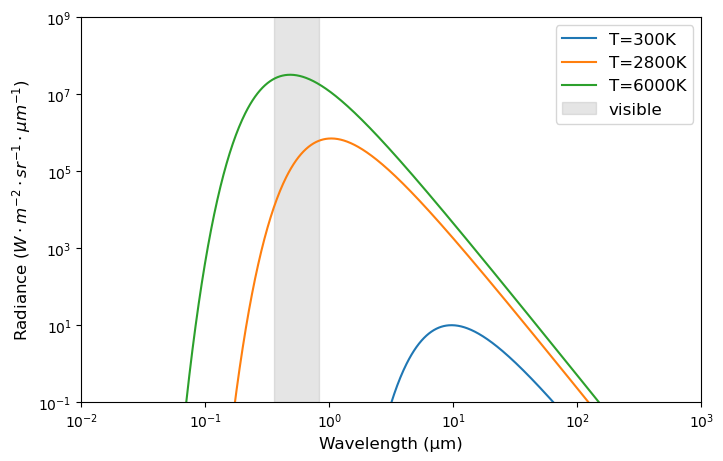

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
wavelength = np.logspace(-2, 3, 1000)
for T in [300, 2800, 6000]:
    radiance = planck_function(wavelength, T, unit='um')
    ax.plot(wavelength, radiance, label=f'T={T}K')
ax.axvspan(0.36, 0.83, color='gray', alpha=0.2, label='visible')
ax.legend(fontsize='large')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 1e3)
ax.set_ylim(1e-1, 1e9)
ax.minorticks_off()
ax.set_xlabel('Wavelength (μm)', fontsize='large')
unit_str = r'$W \cdot m^{-2} \cdot sr^{-1} \cdot \mu m^{-1}$'
ax.set_ylabel(f'Radiance ({unit_str})', fontsize='large')